<a href="https://colab.research.google.com/github/Hongyongmin/Edwith-Pytorch/blob/main/11_4_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(0)

In [3]:
def minmax_scaler(data):
  numerator = data - np.min(data,0)
  denominator = np.max(data, 0) - np.min(data,0)
  return numerator / (denominator + 1e-7)

  

In [4]:
def minmax_scaler(data):
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  return numerator / (denominator + 1e-7)

In [5]:
def build_dataset(time_series, seq_length):
  dataX = []
  dataY = []
  for i in range(0, len(time_series) - seq_length):
    _x = time_series[i:i+seq_length, :]
    _y = time_series[i + seq_length, [-1]]
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)
  return np.array(dataX), np.array(dataY)

In [6]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [10]:
from google.colab import files
myfile = files.upload()

Saving data-02-stock_daily.csv to data-02-stock_daily.csv


In [11]:
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]

train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]] -> [0.14877846]
[[0.13075879 0.14979736 0.13950917 0.35107108 0.1339569 ]
 [0.15042457 0.16374824 0.15035617 0.23008873 0.14071632]
 [0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]] -> [0.12107173]
[[0.15042457 0.16374824 0.15035617 0.23008873 0.14071632]
 [0.14549092 0.14452321 0.11061926 0.34481491 0.154517  ]
 [0.16681257 0.20764196 0.18773052 0.4378686  0.22527992]
 [0.18685758 0.18212236 0.1560484  0.60962624 0.15331987]
 [0.14300667 0.13856872 0.13617972 0.22934481 0.12698631]
 [0.1172689  0.14037216 0.1430174  0.21129336 0.14877846]
 [0.13503702 0.12893923 0.13850679 0.18323922 0.12107173]] -

In [12]:
class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim, layers):
    super(Net, self).__init__()
    self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first = True)
    self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x[:, -1])
    return x


net = Net(data_dim, hidden_dim, output_dim, 1)

In [13]:
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [14]:
for i in range(iterations):

  optimizer.zero_grad()
  outputs = net(trainX_tensor)
  loss = criterion(outputs, trainY_tensor)
  loss.backward()
  optimizer.step()
  print(i, loss.item())

0 0.2271038144826889
1 0.18340934813022614
2 0.15106436610221863
3 0.1261231154203415
4 0.10598734021186829
5 0.08915016800165176
6 0.07493706792593002
7 0.06327901035547256
8 0.05449602007865906
9 0.04902385175228119
10 0.04693441092967987
11 0.04731706157326698
12 0.04838263615965843
13 0.04839476943016052
14 0.046337660402059555
15 0.04207770526409149
16 0.03620168939232826
17 0.029662001878023148
18 0.023386560380458832
19 0.01801123656332493
20 0.013800659216940403
21 0.010714652948081493
22 0.008532218635082245
23 0.006976508069783449
24 0.005824481602758169
25 0.004987422842532396
26 0.004524712450802326
27 0.004554683342576027
28 0.005089898593723774
29 0.005920968018472195
30 0.006684892810881138
31 0.007072673179209232
32 0.0069739907048642635
33 0.006471904460340738
34 0.005753520876169205
35 0.0050146933645009995
36 0.004395292140543461
37 0.003953743726015091
38 0.003676638239994645
39 0.00351098389364779
40 0.00340130808763206
41 0.003315107664093375
42 0.0032488943543285

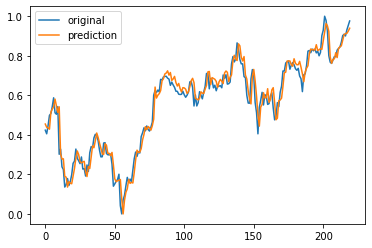

In [16]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original','prediction'])
plt.show()